<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/Intertemporal_Choice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import jax 
import jax.numpy as jnp 

In [14]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [40]:
m1 = 1000 
m2 = 700 
r_saving = 0.01
r_borrowing = 0.1

def budget_constraint(m1, m2, r_saving, r_borrowing, x1):
  rate = jnp.where(m1 > x1, r_saving, r_borrowing)
  return m2 + (m1-x1)*(1+rate)

b = lambda x: budget_constraint(m1, m2, r_saving, r_borrowing, x)

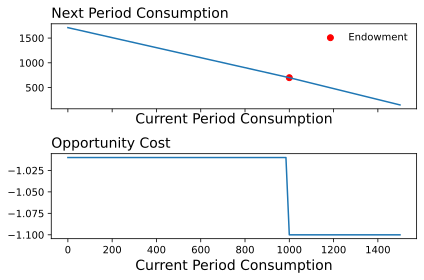

In [48]:
xs = jnp.linspace(0,1500, 100)
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, tight_layout=True)
ax0.plot(xs, jax.vmap(b)(xs))
ax0.scatter(m1, m2, color='red', label='Endowment')
ax0.set_title('Next Period Consumption', size=14, loc='left')
ax0.set_xlabel('Current Period Consumption', size=14)
ax0.legend(frameon=False)
ax1.plot(xs, jax.vmap(jax.grad(b))(xs))
ax1.set_title('Opportunity Cost', size=14, loc='left')
ax1.set_xlabel('Current Period Consumption', size=14)
plt.show()